# Demo notebook

In [1]:
# Import basic libraries
from palmerpenguins import load_penguins
from sklearn.datasets import load_iris
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
import time
from sklearn.preprocessing import LabelEncoder


In [2]:
# Import personalized libraries
from fuzz.src.capacity import *
from fuzz.src.choquet import *
from fuzz.src.norm import *
from fuzz.src.knn import KNNFuzz
from fuzz.src.sim import S1, S2, S3
from fuzz.optim import *
from fuzz.utils import *
from fuzz.eval import leave_one_out
from fuzz.dataloader import *

## Random test

In [3]:
data, labels = dynamic_generate_positive_gaussian_data(
    dim=3,
    nb_classes=3,
    nb_points_per_class=100,
    seed=42
)
data = batch_norm(data)
data[:5]

array([[0.        , 1.        , 0.01959192],
       [1.        , 0.        , 0.4070175 ],
       [0.        , 0.38090406, 1.        ],
       [0.6965442 , 0.        , 1.        ],
       [0.        , 1.        , 0.99405304]])

In [4]:
choquet = Choquet(X=data[0], mu=generate_capacity(enumerate_permute_unit(data[0])))
print(choquet.choquet)
# choquet.Choquet_classic(verbose=True)

0.6829577134340568


In [5]:
mu=generate_capacity(enumerate_permute_unit(data[0]))
sim = S1(X=data[0], Y=data[10], mu=mu)
print(sim.score())

0.95928034189108


In [6]:
for i in range(10):
    sim = S1(X=data[0], Y=data[i], mu=mu)
    print(sim.score())

0.970149791413415
0.004193889097170564
0.2201897569032835
0.00792523817669903
0.5653215515204979
1.1796096389681858
0.7151298063857441
0.7623166444143178
0.00816066349829479
0.6974358830025682


In [7]:
knn = KNNFuzz(input_dimension=4, mu=mu)
knn.train(data, labels)

Leave one out avec k = 1
SimLevel1: 0.3
SimLevel2: 0.32666666666666666
SimLevel3: 0.32

Result in 12.9336 seconds.
Leave one out avec k = 2
SimLevel1: 0.33666666666666667
SimLevel2: 0.36
SimLevel3: 0.33

Result in 10.9285 seconds.
Leave one out avec k = 3
SimLevel1: 0.34
SimLevel2: 0.30333333333333334
SimLevel3: 0.3566666666666667

Result in 9.1753 seconds.
Leave one out avec k = 4
SimLevel1: 0.27
SimLevel2: 0.3433333333333333
SimLevel3: 0.2866666666666667

Result in 9.4472 seconds.
Leave one out avec k = 5
SimLevel1: 0.30333333333333334
SimLevel2: 0.27666666666666667
SimLevel3: 0.30333333333333334

Result in 9.2709 seconds.
Leave one out avec k = 6
SimLevel1: 0.28
SimLevel2: 0.2833333333333333
SimLevel3: 0.31

Result in 9.1675 seconds.
Leave one out avec k = 7
SimLevel1: 0.28
SimLevel2: 0.3566666666666667
SimLevel3: 0.3

Result in 9.8567 seconds.
Leave one out avec k = 8
SimLevel1: 0.32
SimLevel2: 0.27666666666666667
SimLevel3: 0.2866666666666667

Result in 9.0549 seconds.
Leave one o

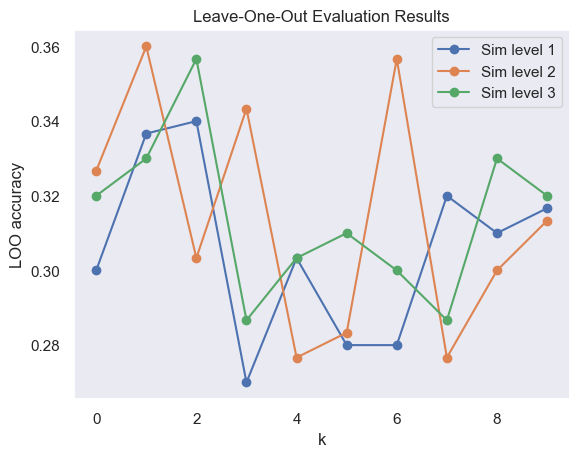

In [8]:
# LOO evaluation
# Define list for each sim level
l1 = []
l2 = []
l3 = []
k = 10

for k in range(1, k+1): 
    tic = time.time()
    mu = generate_capacity(enumerate_permute_unit(data[0]))

    print(f"Leave one out avec k = {k}")
    
    # SimLevel1
    res = leave_one_out(
            C = KNNFuzz(input_dimension=data.shape[1],mu=mu, k=k, sim=S1), 
            DS = (data, labels)
        )
    l1.append(res)
    print(f"SimLevel1: {res}")
    # Sim level 2
    res = leave_one_out(
            C = KNNFuzz(input_dimension=data.shape[1],mu=mu, k=k, sim=S2), 
            DS = (data, labels)
        )
    l2.append(res)
    print(f"SimLevel2: {res}")

    # Sim level 3
    res = leave_one_out(
            C = KNNFuzz(input_dimension=data.shape[1],mu=mu, k=k, sim=S3), 
            DS = (data, labels)
        )
    l3.append(res)
    print(f"SimLevel3: {res}\n")

    toc = time.time()
    print(f"Result in {(toc-tic):0.4f} seconds.")

# Plot results
plt.plot(l1, label="Sim level 1", marker='o')
plt.plot(l2, label="Sim level 2", marker='o')
plt.plot(l3, label="Sim level 3", marker='o')

# Config additional params
plt.ylabel("LOO accuracy")
plt.xlabel("k")
plt.title("Leave-One-Out Evaluation Results")
plt.grid()
plt.legend()

## Test on iris

In [9]:
iris = load_iris(as_frame=True)  # returns a dict-like object
df = iris.frame  # get as pandas DataFrame

X = df.drop(columns='target')  # features
y = df['target']  # target

# Turn into array
X = np.array(X)
y = np.array(y)

In [10]:
# Hyperparameters
dim = X.shape[1]  # number of features
nb_classes = len(np.unique(y))  # number of classes

# Normalize data
data_norm = batch_norm(X)
data_labels = sync_lst_to_float_lst(y)
print(f"Normalized data: {data_norm.shape[0]} samples in {data_norm.shape[1]}D space.")

Normalized data: 150 samples in 4D space.


Leave one out avec k = 1
SimLevel1: 0.6666666666666666
SimLevel2: 0.5933333333333334
SimLevel3: 0.6666666666666666

Result in 4.2133 seconds.
Leave one out avec k = 2
SimLevel1: 0.6666666666666666
SimLevel2: 0.6
SimLevel3: 0.7666666666666667

Result in 4.4744 seconds.
Leave one out avec k = 3
SimLevel1: 0.6666666666666666
SimLevel2: 0.66
SimLevel3: 0.6666666666666666

Result in 4.3545 seconds.
Leave one out avec k = 4
SimLevel1: 0.6666666666666666
SimLevel2: 0.6733333333333333
SimLevel3: 0.6666666666666666

Result in 4.4851 seconds.
Leave one out avec k = 5
SimLevel1: 0.6666666666666666
SimLevel2: 0.6733333333333333
SimLevel3: 0.6666666666666666

Result in 4.2145 seconds.
Leave one out avec k = 6
SimLevel1: 0.6666666666666666
SimLevel2: 0.6666666666666666
SimLevel3: 0.6666666666666666

Result in 4.7386 seconds.
Leave one out avec k = 7
SimLevel1: 0.6666666666666666
SimLevel2: 0.6666666666666666
SimLevel3: 0.6733333333333333

Result in 4.3616 seconds.
Leave one out avec k = 8
SimLevel1:

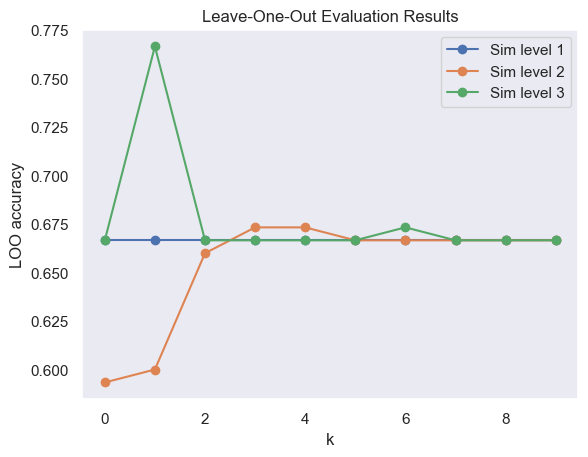

In [11]:
# LOO evaluation
# Define list for each sim level
l1 = []
l2 = []
l3 = []
k = 10

for k in range(1, k+1): 
    tic = time.time()
    mu = generate_capacity(enumerate_permute_unit(data_norm[0]))

    print(f"Leave one out avec k = {k}")
    
    # SimLevel1
    res = leave_one_out(
            C = KNNFuzz(input_dimension=data_norm.shape[1],mu=mu, k=k, sim=S1), 
            DS = (data_norm, data_labels)
        )
    l1.append(res)
    print(f"SimLevel1: {res}")
    # Sim level 2
    res = leave_one_out(
            C = KNNFuzz(input_dimension=data_norm.shape[1],mu=mu, k=k, sim=S2), 
            DS = (data_norm, data_labels)
        )
    l2.append(res)
    print(f"SimLevel2: {res}")

    # Sim level 3
    res = leave_one_out(
            C = KNNFuzz(input_dimension=data_norm.shape[1],mu=mu, k=k, sim=S3), 
            DS = (data_norm, data_labels)
        )
    l3.append(res)
    print(f"SimLevel3: {res}\n")

    toc = time.time()
    print(f"Result in {(toc-tic):0.4f} seconds.")

# Plot results
plt.plot(l1, label="Sim level 1", marker='o')
plt.plot(l2, label="Sim level 2", marker='o')
plt.plot(l3, label="Sim level 3", marker='o')

# Config additional params
plt.ylabel("LOO accuracy")
plt.xlabel("k")
plt.title("Leave-One-Out Evaluation Results")
plt.grid()
plt.legend()

## Test penguins

In [12]:
penguins = load_penguins()
penguins

# Encode
le = LabelEncoder()
le.fit(penguins['island'])
penguins['island'] = le.transform(penguins['island'])

le.fit(penguins['sex'])
penguins['sex'] = le.transform(penguins['sex'])

le.fit(penguins['species'])
penguins['species'] = le.transform(penguins['species'])

# Remove missing values
penguins = penguins.dropna()  # remove rows with missing values
X = penguins.drop(columns='species')  # features
y = penguins['species']  # target

# Turn into array
X = np.array(X)
y = np.array(y)

In [13]:
# Hyperparameters
dim = X.shape[1]  # number of features
nb_classes = len(np.unique(y))  # number of classes

# Normalize data
data_norm = batch_norm(X)
data_labels = sync_lst_to_float_lst(y)
print(f"Normalized data: {data_norm.shape[0]} samples in {data_norm.shape[1]}D space.")

Normalized data: 342 samples in 7D space.


In [ ]:
# LOO evaluation
# Define list for each sim level
l1 = []
l2 = []
l3 = []
k = 10

for k in range(1, k+1): 
    tic = time.time()
    mu = generate_capacity(enumerate_permute_unit(data_norm[0]))

    print(f"Leave one out avec k = {k}")
    
    # SimLevel1
    res = leave_one_out(
            C = KNNFuzz(input_dimension=data_norm.shape[1],mu=mu, k=k, sim=S1), 
            DS = (data_norm, data_labels)
        )
    l1.append(res)
    print(f"SimLevel1: {res}")
    # Sim level 2
    res = leave_one_out(
            C = KNNFuzz(input_dimension=data_norm.shape[1],mu=mu, k=k, sim=S2), 
            DS = (data_norm, data_labels)
        )
    l2.append(res)
    print(f"SimLevel2: {res}")

    # Sim level 3
    res = leave_one_out(
            C = KNNFuzz(input_dimension=data_norm.shape[1],mu=mu, k=k, sim=S3), 
            DS = (data_norm, data_labels)
        )
    l3.append(res)
    print(f"SimLevel3: {res}")

    toc = time.time()
    print(f"Result in {(toc-tic):0.4f} seconds.\n")

# Plot results
plt.plot(l1, label="Sim level 1", marker='o')
plt.plot(l2, label="Sim level 2", marker='o')
plt.plot(l3, label="Sim level 3", marker='o')

# Config additional params
plt.ylabel("LOO accuracy")
plt.xlabel("k")
plt.title("Leave-One-Out Evaluation Results")
plt.grid()
plt.legend()

Leave one out avec k = 1
SimLevel1: 0.5321637426900585
SimLevel2: 0.5818713450292398
SimLevel3: 0.4824561403508772
Result in 221.0498 seconds.

Leave one out avec k = 2
SimLevel1: 0.6695906432748538
SimLevel2: 0.5964912280701754
SimLevel3: 0.695906432748538
Result in 215.7454 seconds.

Leave one out avec k = 3
SimLevel1: 0.4327485380116959
SimLevel2: 0.52046783625731
SimLevel3: 0.5058479532163743
Result in 216.6631 seconds.

Leave one out avec k = 4
SimLevel1: 0.5175438596491229
SimLevel2: 0.4678362573099415
SimLevel3: 0.6140350877192983
Result in 212.4999 seconds.

Leave one out avec k = 5
SimLevel1: 0.5672514619883041
SimLevel2: 0.4327485380116959
SimLevel3: 0.6432748538011696
Result in 213.0915 seconds.

Leave one out avec k = 6
SimLevel1: 0.6140350877192983
SimLevel2: 0.41228070175438597
SimLevel3: 0.6842105263157895
Result in 225.5965 seconds.

Leave one out avec k = 7
SimLevel1: 0.4678362573099415
SimLevel2: 0.39473684210526316
SimLevel3: 0.4766081871345029
Result in 221.6927 sec

## PySwarms

In [ ]:
# Example parameters
n_particles = 30
dimensions = data.shape[1]  # number of features
options = {
    'c1': 0.5,    # cognitive parameter
    'c2': 0.3,    # social parameter
    'w': 0.9      # inertia parameter
}
pso_type = "global"  # or "local" for local best PSO

# Load your data and labels here
# Example:
# data = np.load('your_data.npy')
# labels = np.load('your_labels.npy')

knn = KNNFuzz(input_dimension=dimensions, mu=generate_capacity(enumerate_permute_unit(data[0])), k=5, sim=S1)

# Create PSO optimizer
pso = PSO(n_particles, dimensions, options, (data, labels), knn, pso_type)

# Run optimization
best_cost, best_mu = pso.optimize(fitness_function, n_iters=100)

# Apply softmax to the best result to get the final capacity values
final_capacity = softmax(best_mu)

print(f"Best cost: {-best_cost}")  # Convert back to accuracy
print(f"Best capacity parameters: {final_capacity}")

# Generate final capacity from the optimized parameters
final_capacity_obj = generate_capacity(enumerate_permute_unit(final_capacity))

tmp = []
for i in range(len(final_capacity_obj)):
    print(f"Class {i}: {final_capacity_obj[i].mu}")
    tmp.append(final_capacity_obj[i].mu)

print(f"Final capacity: {tmp}")

2025-05-05 14:42:01,004 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best:  35%|███▌      |35/100, best_cost=-0.31